#Mall customers segmentation

Market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, If you are a t-shirt manufacturer, let's say you want to size your t shirts, so how big you should make the t shirts? You can indentify the most profitable segments, but also to develop profiles of key segments taking different marketing programs – that is, different offers, prices, promotion, distribution, or some combination of marketing variables. This data set can be find on https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
We are given an unlabeled data set and we would like to have an algorithm automatically group the data into coherent subsets or into coherent clusters for us, we ulityse the K Means algorithm.  


Reading the Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport

#Load and prepare data
data = pd.read_csv('/home/leandro/Desktop/Kmeans/Mall_Customers.csv')
features = ['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)' ]
x = np.array(data[features])

#Profiling report
profile = ProfileReport(file, title='MalltDF' )
profile.to_file("your_report.html")


![PFMAll](https://user-images.githubusercontent.com/83521233/122687916-6366c300-d1ef-11eb-8b51-2bf164b4f951.png)

No missing or duplicates rows, no feature needing encoding, we are ready to start the analysis.

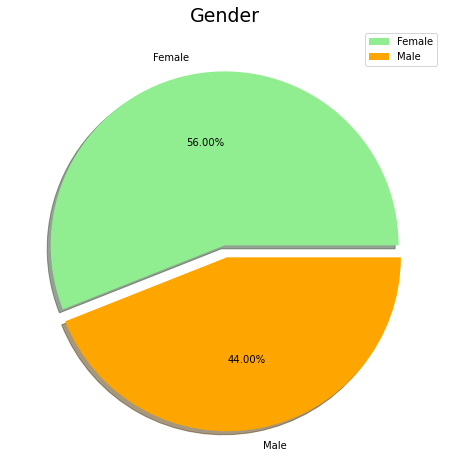

In [3]:
labels = ['Female','Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, shadow = True, explode = explode, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 19)
plt.axis('off')
plt.legend()
plt.savefig('/home/leandro/Desktop/Kmeans/Mall_Customers.png')
plt.show()

/home/leandro/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


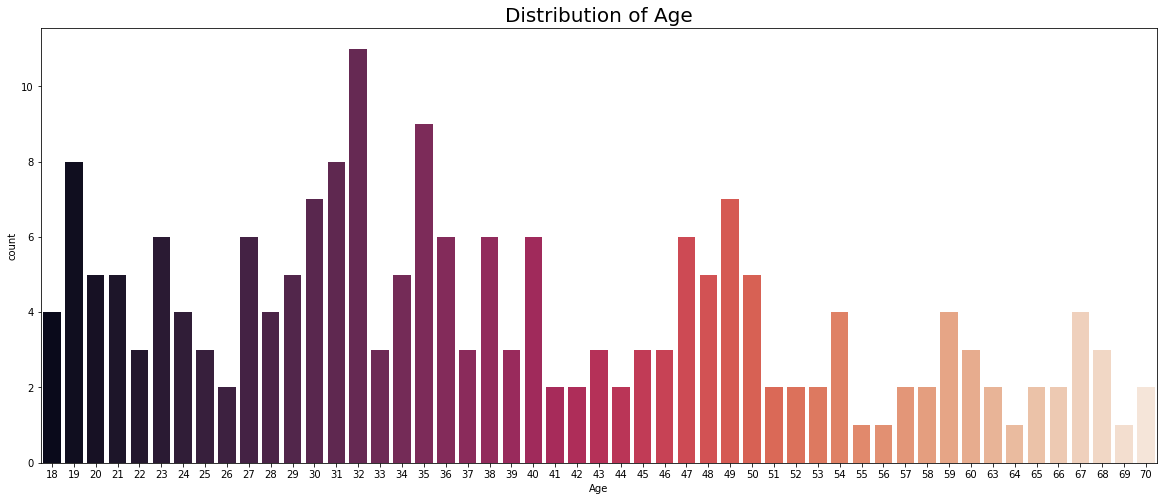

In [13]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Age'], palette = "rocket")
plt.title('Distribution of Age', fontsize = 20)
plt.show()



On figure above we can see the sex(we have more woman 56%) and the age, the most frequent age,  the less frequent, this starts give us a picture of who is our public.

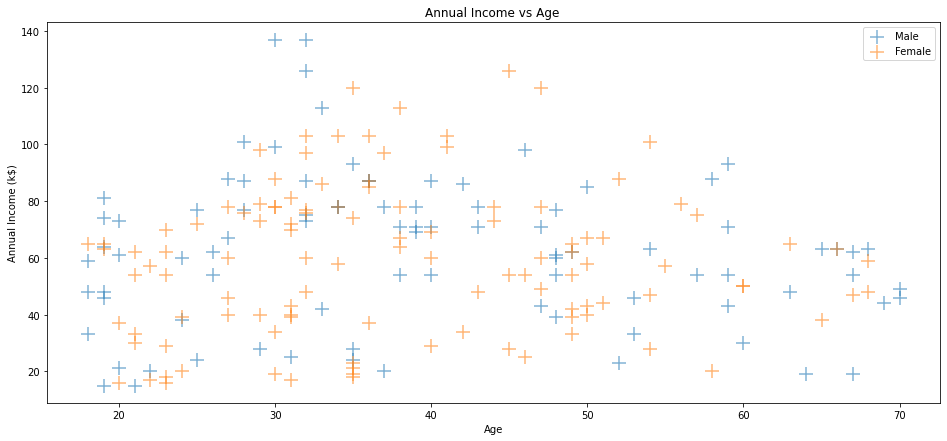

In [15]:
plt.figure(1 , figsize = (16 , 7))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 210 , alpha = 0.56, label = gender, marker='+' )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Annual Income vs Age ')
plt.legend()
plt.show()




Here we can see how much is the Annual income their sex and age.

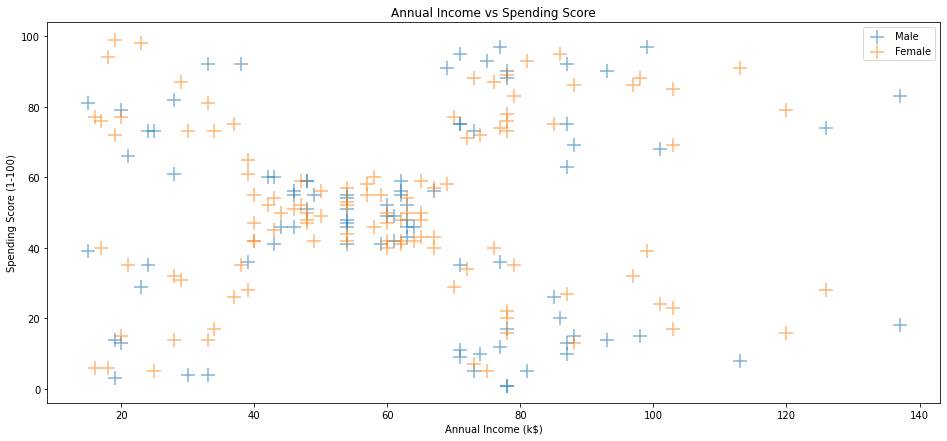

In [16]:
plt.figure(1 , figsize = (16 , 7))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 210 , alpha = 0.56 , label = gender, marker='+')
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.legend()
plt.show()

We have a very good image of who is our public their 'spending score' vs Annual income and their sex. 

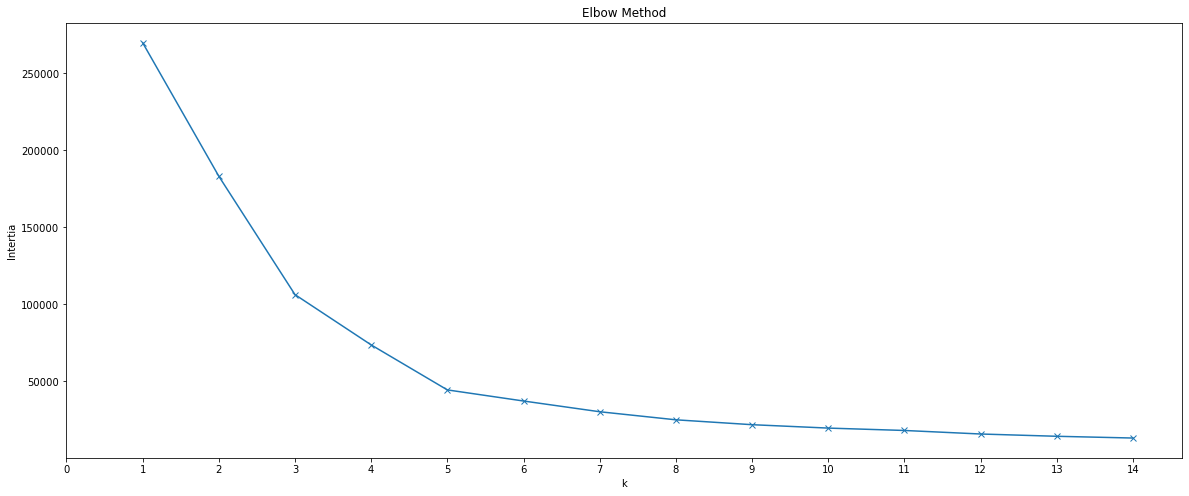

In [19]:
features = ['Annual Income (k$)','Spending Score (1-100)' ]
x1 = np.array(data[features])



intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x1)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

Looking at the data set like this, we are aren't given labels, how to choose the true number of clusters? And theres only one right number? I don't think there is one right answer, and this is part of our unsupervised learning.The figure above is one method that we can use, is called the Elbow Method. So, we're going to run K-means from one to fifteen clusters and so we end up with a curve that goes down as we increase the number of clusters, now we choose 5 clustes because that's the elbow of this curve. 


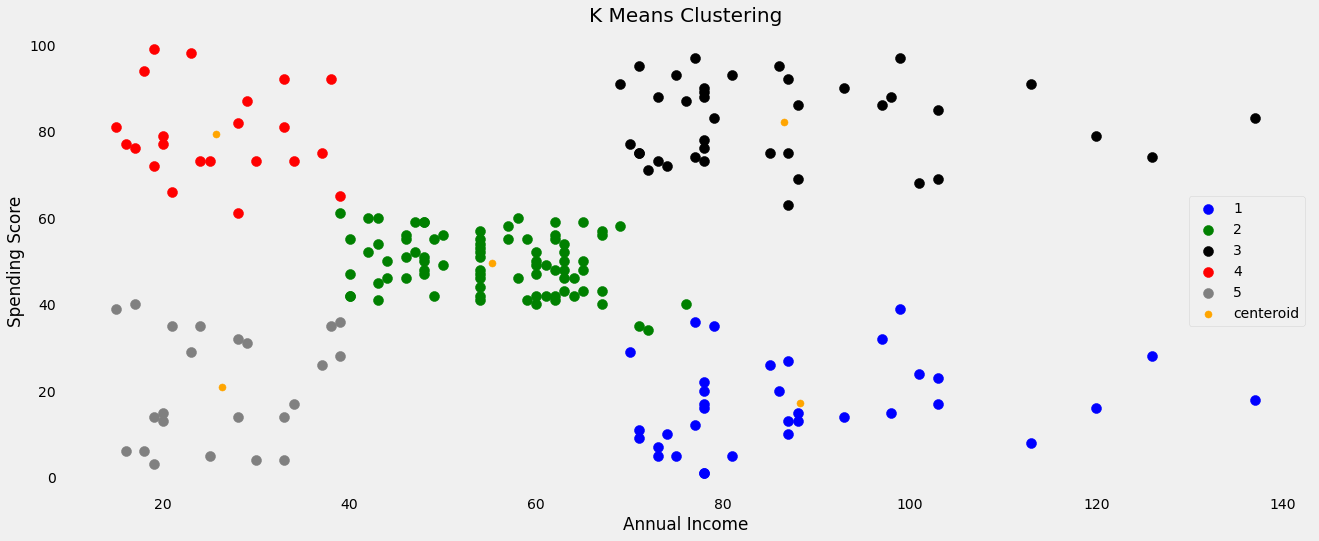

In [26]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x1)

plt.scatter(x1[y_means == 0, 0], x1[y_means == 0, 1], s = 100, c = 'blue', label = '1')
plt.scatter(x1[y_means == 1, 0], x1[y_means == 1, 1], s = 100, c = 'green', label = '2')
plt.scatter(x1[y_means == 2, 0], x1[y_means == 2, 1], s = 100, c = 'black', label = '3')
plt.scatter(x1[y_means == 3, 0], x1[y_means == 3, 1], s = 100, c = 'red', label = '4')
plt.scatter(x1[y_means == 4, 0], x1[y_means == 4, 1], s = 100, c = 'gray', label = '5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'orange' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()





We can see a cleary segmentation of our public based on spending score vs Annual income we have five groups.

Cluster 1 (Blue Color) -> earning high but spending less
cluster 2 (Green Color) -> average in terms of earning and spending 
cluster 3 (Black Color) -> earning high and also spending high.
cluster 4 (Red Color) -> earning less but spending more
Cluster 5 (Gray Color) -> Earning less , spending less
  
Armed with this understanding we can delivery our message for greatest impact.  
  

Elbow method to Age vs Spending score

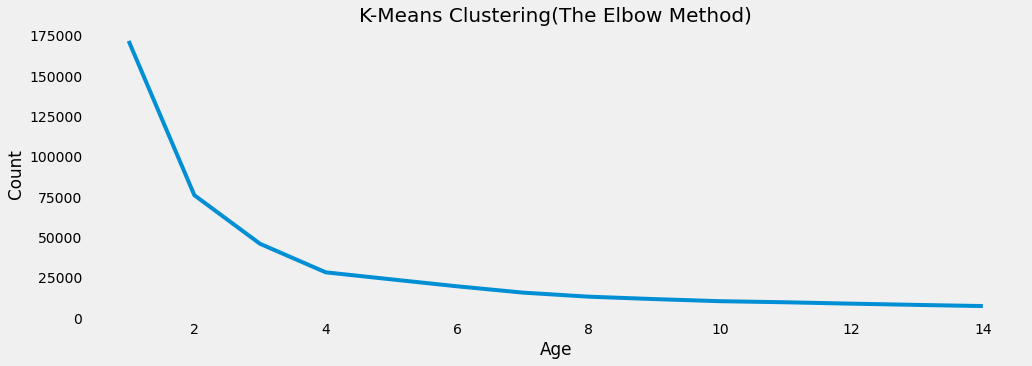

In [31]:
features = ['Age','Spending Score (1-100)' ]
x1 = np.array(data[features])
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 15), inertia)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

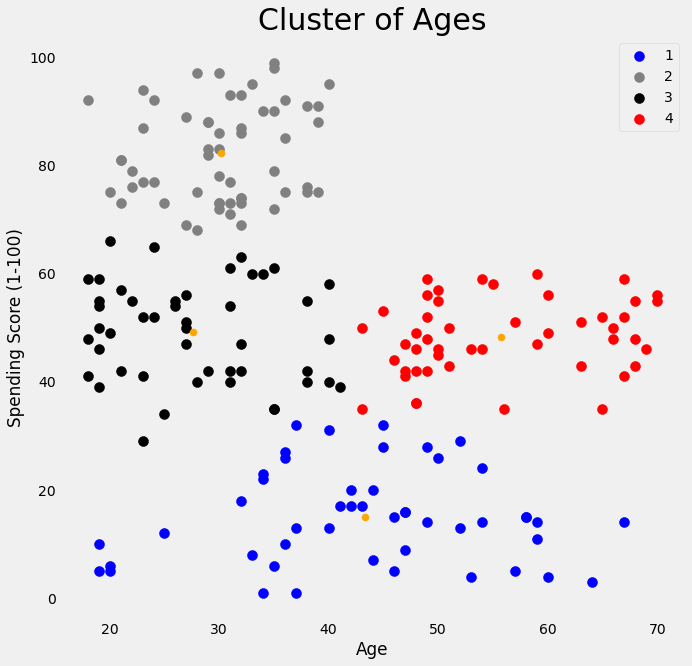

In [34]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x1)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x1[ymeans == 0, 0], x1[ymeans == 0, 1], s = 100, c = 'blue', label = '1' )
plt.scatter(x1[ymeans == 1, 0], x1[ymeans == 1, 1], s = 100, c = 'gray', label = '2')
plt.scatter(x1[ymeans == 2, 0], x1[ymeans == 2, 1], s = 100, c = 'black', label = '3')
plt.scatter(x1[ymeans == 3, 0], x1[ymeans == 3, 1], s = 100, c = 'red', label = '4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'orange')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()



Here we have four groups, now we know the age of the group and how much are their 'spending score'.

Now we can create a more efficient and cost effective marketing strategy. 